In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

74.20382165605095
18.890814558058924


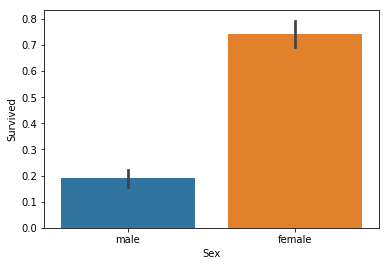

In [61]:
sns.barplot(x='Sex',y='Survived',data=train)

print(train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print(train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

In [62]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

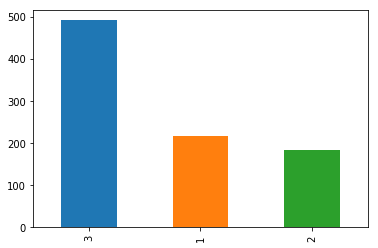

In [65]:
train['Pclass'].value_counts().plot.bar()


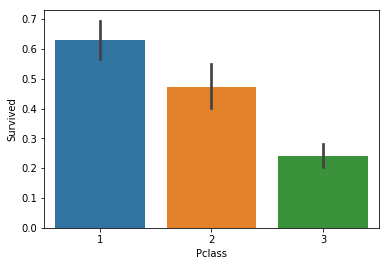

In [66]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [67]:
train['Age']=train.Age.fillna(-0.5)
test['Age']=test.Age.fillna(-0.5)

In [68]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Student','College',' Adult','Senior Adult','Senior']

train['Agegroup']=pd.cut(train['Age'],bins,labels=labels)
test['Agegroup']=pd.cut(test['Age'],bins,labels=labels)

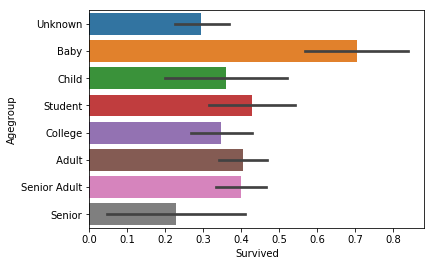

In [69]:
sns.barplot(x='Survived',y='Agegroup',data=train)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [71]:
combine=[train,test]

In [72]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
  
   

In [73]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [74]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major',
                                              'Rev','Jonkheer','Dona'],'Rare')
    
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

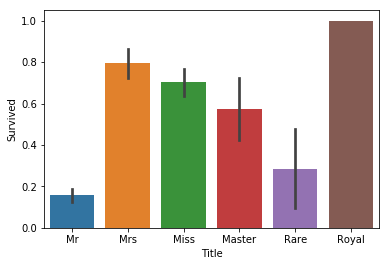

In [75]:
sns.barplot(x='Title',y='Survived',data=train)

In [76]:
title_mapping = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Rare": 5, "Royal": 6}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    


In [77]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [78]:
mr_age = train[train["Title"] == 1]["Agegroup"].mode() #Young Adult
miss_age = train[train["Title"] == 3]["Agegroup"].mode() #Student
mrs_age = train[train["Title"] == 2]["Agegroup"].mode() #Adult
master_age = train[train["Title"] == 4]["Agegroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["Agegroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["Agegroup"].mode() #Adult

In [79]:
print(mr_age)

0     Adult
Name: Agegroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Student < College < Adult < Senior Adult < Senior]


In [80]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [81]:
train.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S,Senior Adult,3
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Adult,2
229,230,0,3,"Lefebre, Miss. Mathilde",female,-0.5,3,1,4133,25.4667,NaN,S,Unknown,3
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S,Adult,1
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,Adult,1
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Senior Adult,2
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,Adult,1
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S,Adult,1
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,College,3
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S,Adult,1


In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [83]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=True)

Embarked      2
Cabin       687
dtype: int64

In [84]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
train=train.fillna({"Embarked":"S"})

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [87]:
sex_mapping={"male":0,"female":1}

train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=train['Sex'].map(sex_mapping)

In [88]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [89]:
embarked_mapping={"S":0,"C":1,"Q":2}

train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=train['Embarked'].map(embarked_mapping)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [92]:
features=['PassengerId','Pclass','Sex','Parch','Embarked','Title','Fare']

In [93]:
y=train['Survived'].copy()
X=train[features].copy()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [94]:
df_train=x_train
df_train.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Fare
331,332,1,0,0,0,1,28.5000
733,734,2,0,0,0,1,13.0000
382,383,3,0,0,0,1,7.9250
704,705,3,0,0,0,1,7.8542
813,814,3,1,2,0,3,31.2750


In [95]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [96]:
df_test=x_test
df_test.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Fare
709,710,3,0,1,1,4,15.2458
439,440,2,0,0,0,1,10.5000
840,841,3,0,0,0,1,7.9250
720,721,2,1,1,0,3,33.0000
39,40,3,1,0,1,3,11.2417


In [97]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [98]:
from sklearn import tree
clfs = {
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}

In [99]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,GaussianNB,0.706667,0.716216,0.711409,0.759777
1,RandomForest,0.793651,0.675676,0.729927,0.793296
2,DecisionTreeClassifier,0.698630,0.689189,0.693878,0.748603
3,SVM,0.750000,0.040541,0.076923,0.597765
4,KNeighborsClassifier,0.680851,0.432432,0.528926,0.681564
5,GradientBoosting,0.811594,0.756757,0.783217,0.826816


In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1


In [101]:
df_majority = train[train.Survived==0]
df_minority = train[train.Survived==1]

print(df_majority.Survived.count())
print("-----------")
print(df_minority.Survived.count())
print("-----------")
print(train.Survived.value_counts())

549
-----------
342
-----------
0    549
1    342
Name: Survived, dtype: int64


In [102]:
#UPSAMPLING DATA

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=549,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Survived.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [119]:
train=pd.read_csv('data/train.csv')

In [120]:
test=pd.read_csv('data/test.csv')

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
train.shape


(891, 12)

In [123]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
train=train.drop(['PassengerId','Name','Ticket'],axis=1)

In [129]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [130]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
test=test.drop(['Name','Ticket'],axis=1)

In [132]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [133]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [134]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [135]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
train['Embarked']=train['Embarked'].fillna('S')

In [137]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

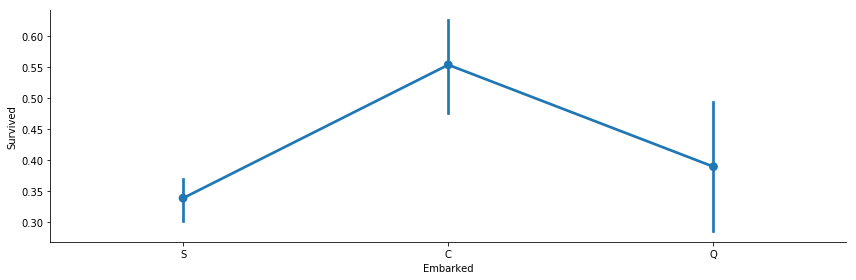

In [140]:
sns.factorplot('Embarked','Survived',data=train,size=4,aspect=3)

In [141]:
train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)